# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 567


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zatec
Processing Record 2 of Set 1 | lihue
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | petauke
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | enewetak
Processing Record 8 of Set 1 | doba
Processing Record 9 of Set 1 | selfoss
Processing Record 10 of Set 1 | petropavlovsk-kamchatsky
Processing Record 11 of Set 1 | solleftea
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | tadine
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | broken hill
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | severo-yeniseyskiy
Processing Record 21 of Set 1 | carutapera
Processing Record 22 of Set 1 |

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zatec,50.3272,13.5458,7.97,79,96,2.36,CZ,1729134994
1,lihue,21.9789,-159.3672,27.77,65,20,7.72,US,1729134995
2,waitangi,-43.9535,-176.5597,10.46,80,57,2.68,NZ,1729134997
3,petauke,-14.2426,31.3253,16.12,80,62,3.85,ZM,1729134998
4,ilulissat,69.2167,-51.1000,-7.99,62,2,2.57,GL,1729134999


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zatec,50.3272,13.5458,7.97,79,96,2.36,CZ,1729134994
1,lihue,21.9789,-159.3672,27.77,65,20,7.72,US,1729134995
2,waitangi,-43.9535,-176.5597,10.46,80,57,2.68,NZ,1729134997
3,petauke,-14.2426,31.3253,16.12,80,62,3.85,ZM,1729134998
4,ilulissat,69.2167,-51.1000,-7.99,62,2,2.57,GL,1729134999


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

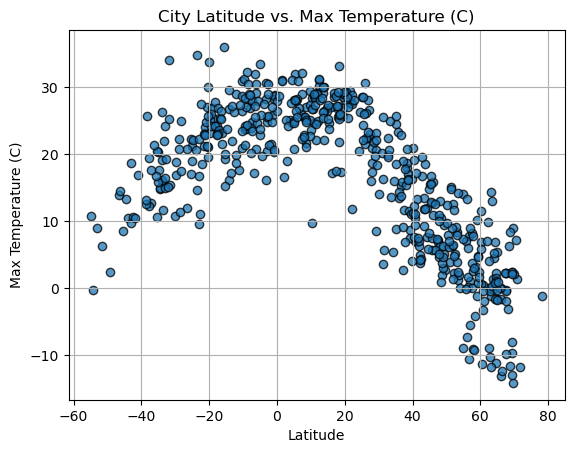

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

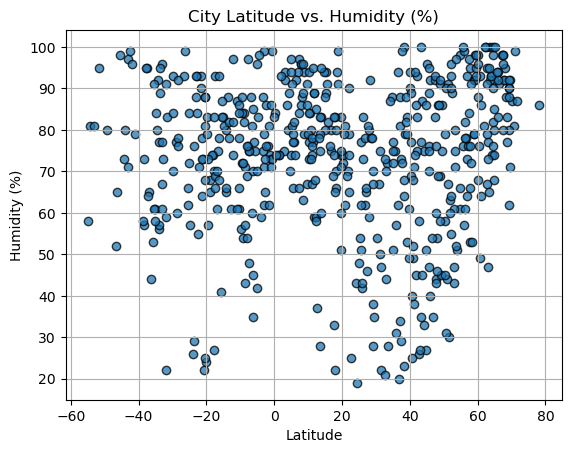

In [17]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

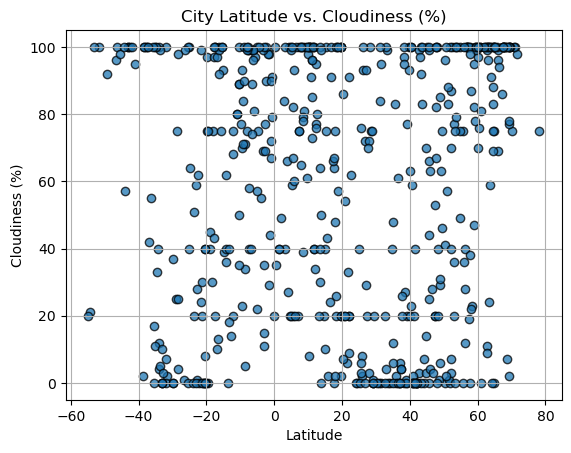

In [18]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

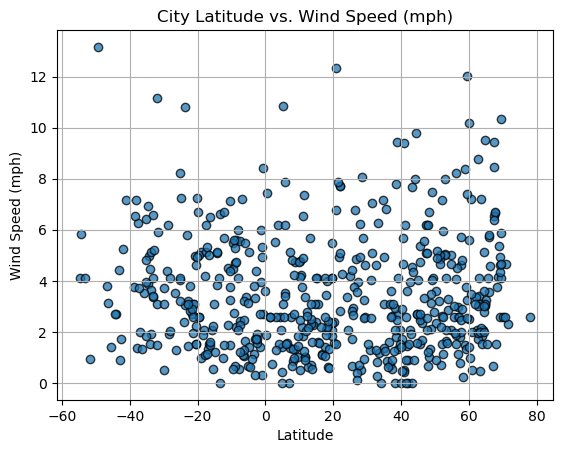

In [19]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zatec,50.3272,13.5458,7.97,79,96,2.36,CZ,1729134994
1,lihue,21.9789,-159.3672,27.77,65,20,7.72,US,1729134995
4,ilulissat,69.2167,-51.1000,-7.99,62,2,2.57,GL,1729134999
5,anadyr,64.7500,177.4833,2.28,80,0,3.00,RU,1729135000
6,enewetak,11.3474,162.3373,28.67,77,100,7.37,MH,1729135001


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,10.46,80,57,2.68,NZ,1729134997
3,petauke,-14.2426,31.3253,16.12,80,62,3.85,ZM,1729134998
11,adamstown,-25.0660,-130.1015,21.27,84,100,8.21,PN,1729135006
12,port-aux-francais,-49.3500,70.2167,2.42,80,92,13.16,TF,1729134725
13,tadine,-21.5500,167.8833,21.19,90,99,2.71,NC,1729135010


###  Temperature vs. Latitude Linear Regression Plot

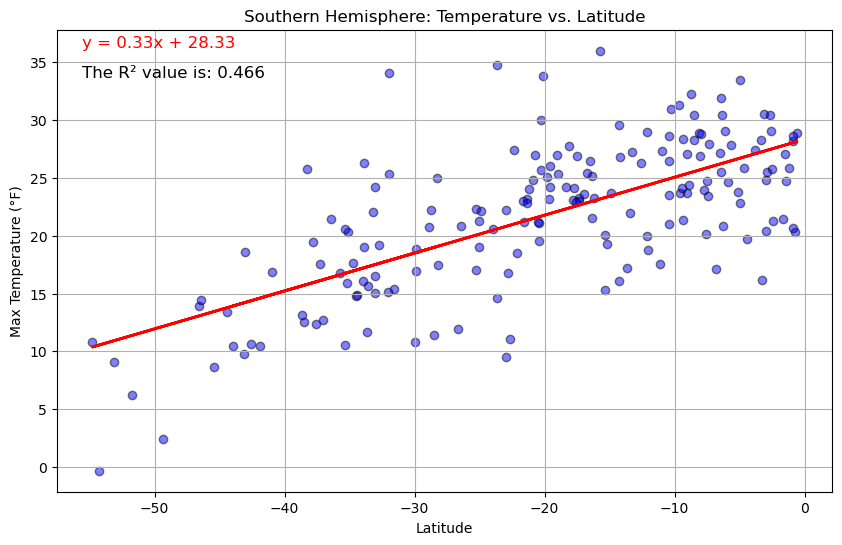

In [53]:
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
r_squared_text = f"The R² value is: {r_value**2:.3f}"

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, edgecolors='k', label='City Data')

# Plot the regression line
plt.plot(x, regression_line, color='red', linewidth=2, label='Regression Line')



# Incorporate other graph properties
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.grid()

plt.figtext(0.15, 0.85, equation_text, fontsize=12, color='red')
plt.figtext(0.15, 0.80, r_squared_text, fontsize=12)

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Temperature_vs_Latitude.png")

# Show plot
plt.show()

**Discussion about the linear relationship:**
 Northern Hemisphere: Generally, there's a negative correlation between latitude and temperature; as latitude increases (moving toward the poles), average temperatures tend to decrease.
 Southern Hemisphere: The trend is similar, with warmer temperatures closer to the equator and cooler temperatures as you move towards the poles.

### Humidity vs. Latitude Linear Regression Plot

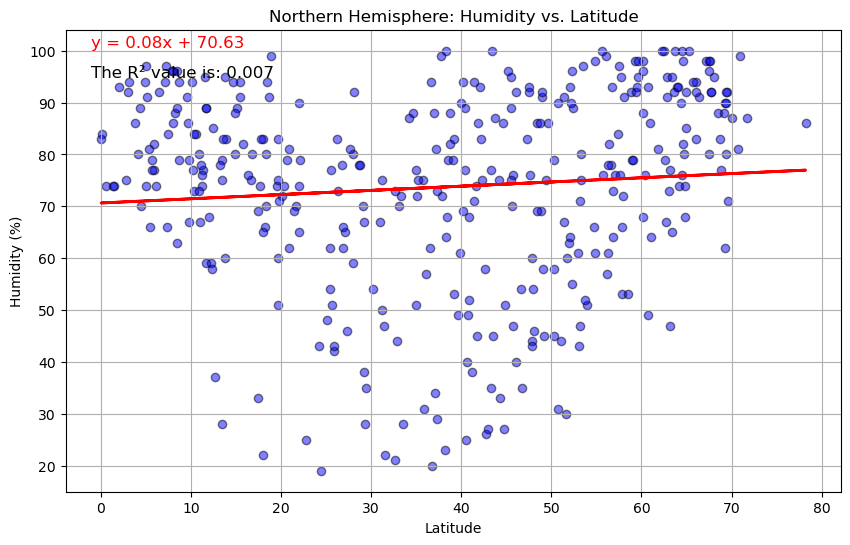

In [52]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
r_squared_text = f"The R² value is: {r_value**2:.3f}"

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, edgecolors='k', label='City Data')

# Plot the regression line
plt.plot(x, regression_line, color='red', linewidth=2, label='Regression Line')

# Incorporate other graph properties
plt.title('Northern Hemisphere: Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.figtext(0.15, 0.85, equation_text, fontsize=12, color='red')
plt.figtext(0.15, 0.80, r_squared_text, fontsize=12)

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Humidity_vs_Latitude.png")

# Show plot
plt.show()

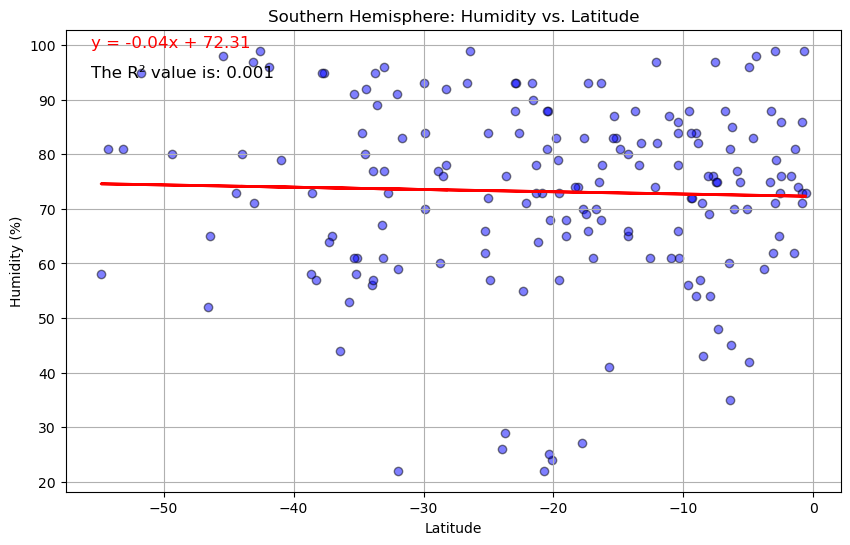

In [51]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
r_squared_text = f"The R² value is: {r_value**2:.3f}"

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, edgecolors='k', label='City Data')

# Plot the regression line
plt.plot(x, regression_line, color='red', linewidth=2, label='Regression Line')

# Incorporate other graph properties
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.figtext(0.15, 0.85, equation_text, fontsize=12, color='red')
plt.figtext(0.15, 0.80, r_squared_text, fontsize=12)
# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Humidity_vs_Latitude.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere: The relationship is not strongly defined; humidity can vary significantly with latitude, with some higher humidity levels occurring in mid-latitudes and others closer to the equator. Southern Hemisphere: A similar pattern is observed, where humidity levels are less predictable, but some regions close to the equator exhibit higher humidity.

### Cloudiness vs. Latitude Linear Regression Plot

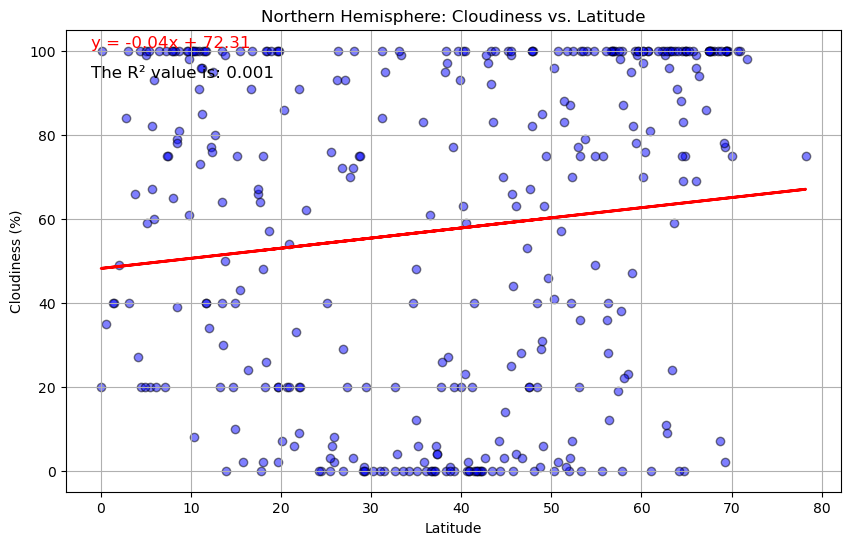

In [50]:
# Northern Hemisphere
x_north = northern_hemi_df["Lat"]
y_north = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope_north, intercept_north, r_value_north, p_value_north, std_err_north = linregress(x_north, y_north)

# Calculate the regression line
regression_line_north = slope_north * x_north + intercept_north

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
r_squared_text = f"The R² value is: {r_value**2:.3f}"

# Create the scatter plot for Northern Hemisphere
plt.figure(figsize=(10, 6))
plt.scatter(x_north, y_north, color='blue', alpha=0.5, edgecolors='k', label='City Data')

# Plot the regression line
plt.plot(x_north, regression_line_north, color='red', linewidth=2, label='Regression Line')

# Incorporate other graph properties
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

plt.figtext(0.15, 0.85, equation_text, fontsize=12, color='red')
plt.figtext(0.15, 0.80, r_squared_text, fontsize=12)

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

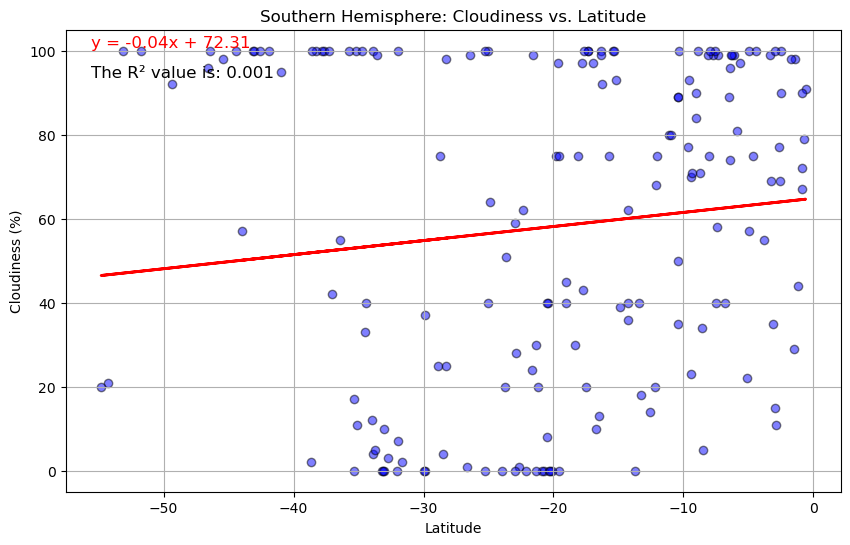

In [49]:
# Southern Hemisphere
x_south = southern_hemi_df["Lat"]
y_south = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope_south, intercept_south, r_value_south, p_value_south, std_err_south = linregress(x_south, y_south)

# Calculate the regression line
regression_line_south = slope_south * x_south + intercept_south

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
r_squared_text = f"The R² value is: {r_value**2:.3f}"

# Create the scatter plot for Southern Hemisphere
plt.figure(figsize=(10, 6))
plt.scatter(x_south, y_south, color='blue', alpha=0.5, edgecolors='k', label='City Data')

# Plot the regression line
plt.plot(x_south, regression_line_south, color='red', linewidth=2, label='Regression Line')

# Incorporate other graph properties
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

plt.figtext(0.15, 0.85, equation_text, fontsize=12, color='red')
plt.figtext(0.15, 0.80, r_squared_text, fontsize=12)

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere: There is a slight trend suggesting that cloudiness may be higher in mid-latitudes, though it fluctuates due to other meteorological factors.
Southern Hemisphere: Cloudiness tends to vary without a clear trend related to latitude, indicating local weather patterns may significantly influence cloud cover.

### Wind Speed vs. Latitude Linear Regression Plot

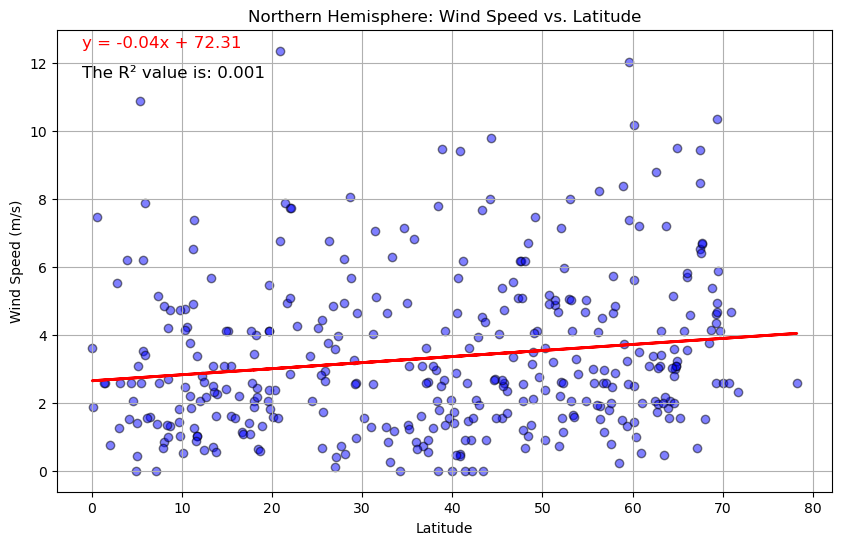

In [48]:
# Northern Hemisphere
x_north = northern_hemi_df["Lat"]
y_north = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope_north, intercept_north, r_value_north, p_value_north, std_err_north = linregress(x_north, y_north)

# Calculate the regression line
regression_line_north = slope_north * x_north + intercept_north

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
r_squared_text = f"The R² value is: {r_value**2:.3f}"

# Create the scatter plot for Northern Hemisphere
plt.figure(figsize=(10, 6))
plt.scatter(x_north, y_north, color='blue', alpha=0.5, edgecolors='k', label='City Data')

# Plot the regression line
plt.plot(x_north, regression_line_north, color='red', linewidth=2, label='Regression Line')

# Incorporate other graph properties
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

plt.figtext(0.15, 0.85, equation_text, fontsize=12, color='red')
plt.figtext(0.15, 0.80, r_squared_text, fontsize=12)

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

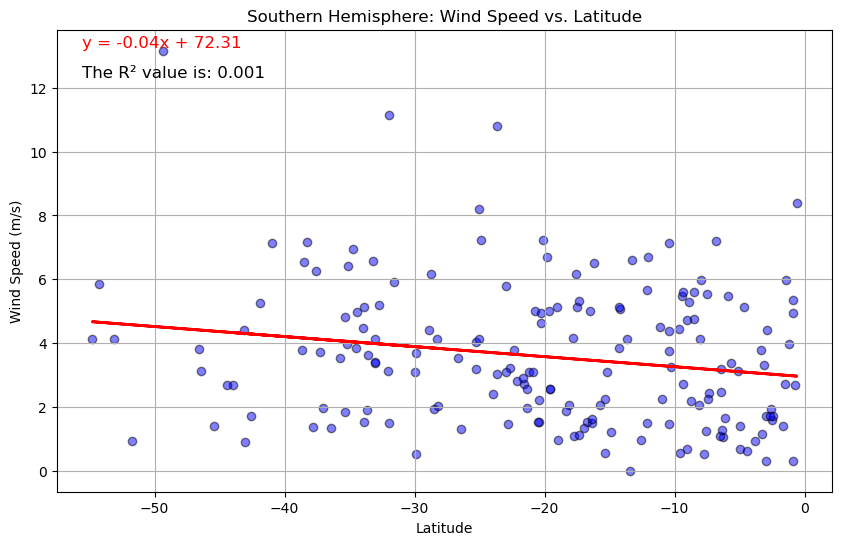

In [47]:
# Southern Hemisphere
x_south = southern_hemi_df["Lat"]
y_south = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope_south, intercept_south, r_value_south, p_value_south, std_err_south = linregress(x_south, y_south)

# Calculate the regression line
regression_line_south = slope_south * x_south + intercept_south

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
r_squared_text = f"The R² value is: {r_value**2:.3f}"

# Create the scatter plot for Southern Hemisphere
plt.figure(figsize=(10, 6))
plt.scatter(x_south, y_south, color='blue', alpha=0.5, edgecolors='k', label='City Data')

# Plot the regression line
plt.plot(x_south, regression_line_south, color='red', linewidth=2, label='Regression Line')

# Incorporate other graph properties
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

plt.figtext(0.15, 0.85, equation_text, fontsize=12, color='red')
plt.figtext(0.15, 0.80, r_squared_text, fontsize=12)

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere: Generally shows a weak correlation; wind speeds can vary across latitudes, influenced by geographic and atmospheric conditions. Southern Hemisphere: The same trend holds, with wind speeds showing variability that does not follow a clear pattern with latitude.